## A MACHINE LEARNING ALGORITHM by Celestine Azonobi
### To predict the survival of passengers of the famous Titanic ship wreck in 1912.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
%%HTML 
<style type="text/css">
table.dataframe td, table.dataframe th {
     border: 1px black solid !important;
    color: black !important;}
</style>

In [3]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

"""Saving the test Traveller ID"""

ID = test_df["traveller_ID"]

In [4]:
train_df.describe() #Data Summary

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare,Survived
count,916.000000,916.000000,729.000000,916.000000,916.000000,915.000000,916.000000
mean,656.248908,2.305677,29.102309,0.539301,0.386463,33.709221,0.361354
std,381.176191,0.841811,13.866954,1.082188,0.893933,52.840656,0.480655
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,328.250000,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,670.000000,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000
75%,974.250000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000
max,1308.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


## Now Let's explore for the percentage of null values

In [5]:
def NullValues(data):
    
    total = data.isnull().sum().sort_values(ascending = False)
    
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
    
    ms= ms[ms["Percentage"] > 0]
    
    f,ax =plt.subplots(figsize=(8,6))
    
    plt.xticks(rotation='90')
    
    fig=sns.barplot(ms.index, ms["Percentage"],color="royalblue",alpha=0.8)
    
    plt.xlabel('Features', fontsize=15)
    
    plt.ylabel('Percentage of missing values', fontsize=15)
    
    plt.title('Percentage of missing values by feature', fontsize=15)
    
    return ms

## Identifying Missing Values

,Total,Percentage
cabin,712,77.729258
MedBoat,589,64.301310
age,187,20.414847
embarked,1,0.109170
fare,1,0.109170


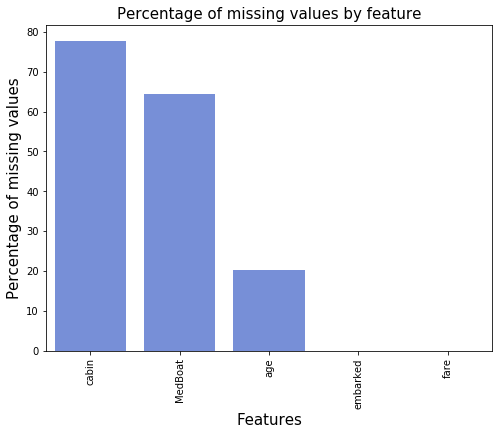

In [6]:
NullValues(train_df)

,Total,Percentage
cabin,302,76.844784
MedBoat,234,59.541985
age,76,19.338422
embarked,1,0.254453


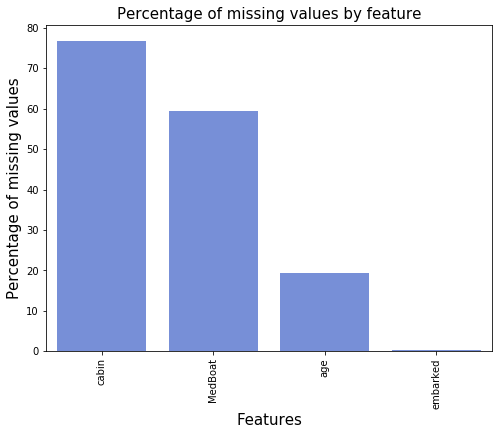

In [7]:
NullValues(test_df)

### Cabin Feature has more than 75% of missing data in both test and train.


## Exploring the numerical features to see how they correlate with each other

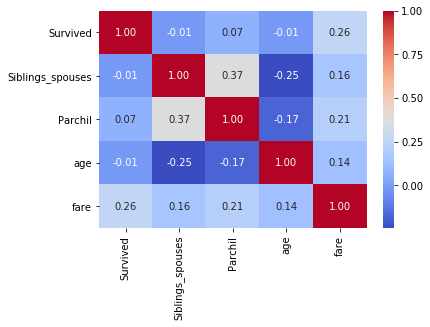

In [8]:
# Correlation matrix between numerical values (Siblings_spouses, Parchil, age and fare values) and Survived 
g = sns.heatmap(train_df[["Survived","Siblings_spouses","Parchil","age","fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


Only Fare feature seems to have a significant correlation with the survival probability.
It doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore in detail the other features.

## Filling some missing Values

In [9]:
train_df['embarked'].mode()

0    S
dtype: object

In [10]:
#Filling the fare column with the mode
train_df['embarked'].fillna(train_df['embarked'].mode()[0], inplace = True)

test_df['embarked'].fillna(test_df['embarked'].mode()[0], inplace = True)

In [11]:
test_df['fare'].fillna(test_df['fare'].median(), inplace = True)

train_df['fare'].fillna(train_df['fare'].median(), inplace = True)

In [14]:
train_df['cabin'].unique()

array(['U0', 'B10', 'T', 'A11', 'C51', 'C22 C26', 'C23 C25 C27', 'C80',
       'E39 E41', 'E12', 'A20', 'F G63', 'C2', 'B61', 'B77', 'B35', 'F38',
       'E34', 'D7', 'D48', 'B49', 'E24', 'C95', 'B96 B98', 'D36', 'D40',
       'C89', 'B38', 'D', 'C46', 'B20', 'C106', 'C116', 'C111', 'B101',
       'B42', 'C93', 'D26', 'B58 B60', 'B57 B59 B63 B66', 'A34', 'C103',
       'E52', 'C85', 'B22', 'D20', 'E31', 'F G73', 'B3', 'D33', 'D34',
       'E50', 'D19', 'F E57', 'A36', 'C65', 'C118', 'C101', 'C83', 'C92',
       'B5', 'F E69', 'E60', 'B102', 'B71', 'D17', 'E33', 'B19', 'C99',
       'F2', 'C49', 'C132', 'B86', 'B4', 'F', 'C97', 'A26', 'C110', 'D21',
       'D15', 'B45', 'B50', 'A14', 'C62 C64', 'A7', 'B18', 'C28', 'G6',
       'D43', 'C124', 'A16', 'F33', 'C148', 'F4', 'A9', 'B28', 'C54',
       'E58', 'D28', 'E36', 'C123', 'A29', 'C31', 'B79', 'E44', 'D37',
       'C82', 'B41', 'B51 B53 B55', 'B82 B84', 'C52', 'C6', 'A21', 'B69',
       'D9', 'D46', 'E10', 'E46', 'B24', 'E101', 'D45', 

### Let's do something with the cabin column

In [15]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

data = [train_df, test_df]

for dataset in data:
    
    dataset['cabin'] = dataset['cabin'].fillna("U0")
    
    dataset['Deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    
    dataset['Deck'] = dataset['Deck'].map(deck)
    
    dataset['Deck'] = dataset['Deck'].fillna(0)
    
    dataset['Deck'] = dataset['Deck'].astype(int)

In [16]:
test_df['age'].fillna(test_df['age'].median(), inplace = True)
train_df['age'].fillna(train_df['age'].median(), inplace = True)

In [17]:
print("Checking for null values in the features we've worked on from train_df")
print(train_df.isnull().sum())
print('___'*30)
print('check the values value in test data')
print(test_df.isnull().sum())

Checking for null values in the features we've worked on from train_df
traveller_ID          0
ticket_class          0
name                  0
sex                   0
age                   0
Siblings_spouses      0
Parchil               0
TickNum               0
fare                  0
cabin                 0
embarked              0
MedBoat             589
Survived              0
Deck                  0
dtype: int64
__________________________________________________________________________________________
check the values value in test data
traveller_ID          0
ticket_class          0
name                  0
sex                   0
age                   0
Siblings_spouses      0
Parchil               0
TickNum               0
fare                  0
cabin                 0
embarked              0
MedBoat             234
Deck                  0
dtype: int64


Only the MedBoat feature has null values. That will be handled later

In [18]:
## combine test and train as single to apply some function
all_data=[train_df,test_df]

In [19]:
# Create new feature FamilySize as a combination of Siblings_spouses and Parchil
for dataset in all_data:
    
    dataset['FamilySize'] = dataset['Siblings_spouses'] + dataset['Parchil'] + 1

### Define function to extract titles from traveller names

In [20]:
import re
#Note that the parameter "Name" inside the function is different from the name feature
def get_title(Name):
    title_search = re.search(' ([A-Za-z]+)\.', Name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Create a new feature Title, containing the titles of traveller names
for dataset in all_data:
    dataset['Title'] = dataset['name'].apply(get_title)

    # Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


### Creating Categories for age and fare features

In [21]:
## create bin for age features
for dataset in all_data:
    
    dataset['Age_bin'] = pd.cut(dataset['age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [22]:
## create bin for fare features
for dataset in all_data:
    
    dataset['Fare_bin'] = pd.cut(dataset['fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

### For reference, I am making a copy of both DataSet start working from copy of dataset
I"ll use it later for my modelling

In [23]:
traindf=train_df

testdf=test_df

In [24]:
all_dat=[traindf,testdf]

In [25]:
for dataset in all_dat:
    
    drop_column = ['age','fare','name','TickNum']
    
    dataset.drop(drop_column, axis=1, inplace = True)

### Now Let's look at the MedBoat feature

In [26]:
print("MedBoat values for train data are ", train_df["MedBoat"].unique())
print("\n")
print("MedBoat values for test data are ", test_df["MedBoat"].unique())

MedBoat values for train data are  [nan '11' '15' '16' 'B' 'C' 'D' '10' '9' '4' '3' '1' 'A' '8' '12' '14' '7'
 '13' '5' '6' '2' '13 15' '15 16' '5 7' '8 10']


MedBoat values for test data are  [nan 'C' '9' '5' 'D' '13' '8' '6' '12' '15' '14' '4' '16' 'B' '3'
 '13 15 B' '10' '5 9' '2' '7' '11' 'A' 'C D' '5 7']


#### We can see from the above code that the MedBoat column has some alphabetic and alphanumeric values

In [27]:
a = dataset["MedBoat"].value_counts().median()
a

8.0

In [28]:
data = [train_df, test_df]
for dataset in data:
    dataset['MedBoat'] = dataset['MedBoat'].fillna(a)

In [29]:
drop_column = ['traveller_ID','cabin']
traindf.drop(drop_column, axis=1, inplace = True)
testdf.drop(drop_column, axis=1, inplace = True)

#### Using One Hot Encoding to convert categorical variables into numerical.
Note that this will create extra features

In [30]:
traindf = pd.get_dummies(traindf, columns = ["sex","Title","Age_bin","embarked","Fare_bin","MedBoat","Deck"],
                             prefix=["sex","Title","Age_type","Em_type","Fare_type","MedBoat","Deck"])

In [31]:
testdf = pd.get_dummies(testdf, columns = ["sex","Title","Age_bin","embarked","Fare_bin","MedBoat","Deck"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type","MedBoat","Deck"])

In [32]:
traindf.columns

Index(['ticket_class', 'Siblings_spouses', 'Parchil', 'Survived', 'FamilySize',
       'sex_female', 'sex_male', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare', 'Age_type_Children', 'Age_type_Teenage',
       'Age_type_Adult', 'Age_type_Elder', 'Em_type_C', 'Em_type_Q',
       'Em_type_S', 'Fare_type_Low_fare', 'Fare_type_median_fare',
       'Fare_type_Average_fare', 'Fare_type_high_fare', 'MedBoat_8.0',
       'MedBoat_1', 'MedBoat_10', 'MedBoat_11', 'MedBoat_12', 'MedBoat_13',
       'MedBoat_13 15', 'MedBoat_14', 'MedBoat_15', 'MedBoat_15 16',
       'MedBoat_16', 'MedBoat_2', 'MedBoat_3', 'MedBoat_4', 'MedBoat_5',
       'MedBoat_5 7', 'MedBoat_6', 'MedBoat_7', 'MedBoat_8', 'MedBoat_8 10',
       'MedBoat_9', 'MedBoat_A', 'MedBoat_B', 'MedBoat_C', 'MedBoat_D',
       'Deck_0', 'Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'Deck_5', 'Deck_6',
       'Deck_7', 'Deck_8'],
      dtype='object')

In [33]:
testdf.columns

Index(['ticket_class', 'Siblings_spouses', 'Parchil', 'FamilySize',
       'Sex_female', 'Sex_male', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare', 'Age_type_Children', 'Age_type_Teenage',
       'Age_type_Adult', 'Age_type_Elder', 'Em_type_C', 'Em_type_Q',
       'Em_type_S', 'Fare_type_Low_fare', 'Fare_type_median_fare',
       'Fare_type_Average_fare', 'Fare_type_high_fare', 'MedBoat_8.0',
       'MedBoat_10', 'MedBoat_11', 'MedBoat_12', 'MedBoat_13',
       'MedBoat_13 15 B', 'MedBoat_14', 'MedBoat_15', 'MedBoat_16',
       'MedBoat_2', 'MedBoat_3', 'MedBoat_4', 'MedBoat_5', 'MedBoat_5 7',
       'MedBoat_5 9', 'MedBoat_6', 'MedBoat_7', 'MedBoat_8', 'MedBoat_9',
       'MedBoat_A', 'MedBoat_B', 'MedBoat_C', 'MedBoat_C D', 'MedBoat_D',
       'Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'Deck_5', 'Deck_6', 'Deck_7',
       'Deck_8'],
      dtype='object')

In [34]:
traindf.drop(["MedBoat_1","Deck_0"], axis=1, inplace = True)

I dropped "MedBoat_1" and "Deck_0" to make sure that both the train and test data have the same columns after we have dropped the target column

In [35]:
testdf.head()

,ticket_class,Siblings_spouses,Parchil,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,MedBoat_C D,MedBoat_D,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8
0,3.0,0.0,0.0,1.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,3.0,1.0,1.0,3.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,3.0,0.0,0.0,1.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,0.0,0.0,1.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,3.0,0.0,0.0,1.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
traindf.head()

,ticket_class,Siblings_spouses,Parchil,Survived,FamilySize,sex_female,sex_male,Title_Master,Title_Miss,Title_Mr,...,MedBoat_C,MedBoat_D,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8
0,3,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,3,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,3,8,2,0,11,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,3,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


###  Model
Now I'm ready to train a model and predict the required solution. There are lot of predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. I want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port i.e embarked...).

##### We'll be using:

Logistic Regression

KNN

Support Vector Machines

Naive Bayes classifier

Decision Tree

Random Forrest

Linear Discriminant Analysis

Ada Boost Classifier 

Gradient Boosting Classifier

And also compared above given classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure and plot accuracy based confusion matrix

In [37]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
train_features = traindf.drop("Survived",axis=1)
Target = traindf["Survived"]
X_train,X_test,y_train,y_test = train_test_split(train_features,Target,test_size=0.3,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((641, 54), (275, 54), (641,), (275,))

## LOGISTIC REGRESSION

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 97.82
The cross validated score for Logistic REgression is: 97.81


Text(0.5,1.05,'Confusion_matrix')

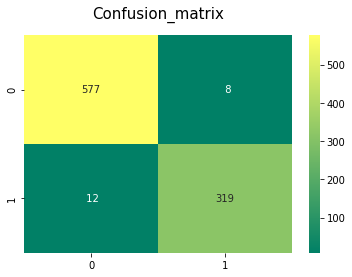

In [40]:
# machine learning
from sklearn.linear_model import LogisticRegression # Logistic Regression

model = LogisticRegression()
model.fit(X_train,y_train)
pred_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(pred_lr,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=10) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(model,train_features,Target,cv=10,scoring='accuracy')
print('The cross validated score for Logistic Regression is:',round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model,train_features,Target,cv=10)
sns.heatmap(confusion_matrix(Target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)




## Random Forests

C:\Users\user\Python\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 96.73
The cross validated score for Random Forest Classifier is: 97.81


Text(0.5,1.05,'Confusion_matrix')

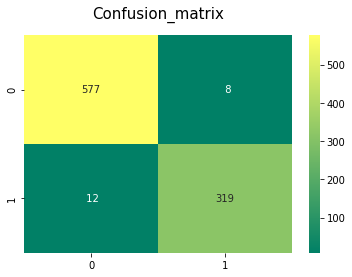

In [41]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=400,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
rf_prediction=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(rf_prediction,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=10) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,train_features,Target,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,train_features,Target,cv=10)
sns.heatmap(confusion_matrix(Target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)



## Support Vector Machines

--------------The Accuracy of the model----------------------------
The accuracy of the Support Vector Machines Classifier is 97.45
The cross validated score for Support Vector Machines Classifier is: 97.81


Text(0.5,1.05,'Confusion_matrix')

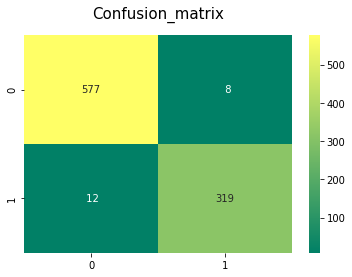

In [42]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC

model = SVC()
model.fit(X_train,y_train)
pred_svm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Support Vector Machines Classifier is',round(accuracy_score(pred_svm,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=10) # k=10, split the data into 10 equal parts
result_svm=cross_val_score(model,train_features,Target,cv=10,scoring='accuracy')
print('The cross validated score for Support Vector Machines Classifier is:',round(result_svm.mean()*100,2))
y_pred = cross_val_predict(model,train_features,Target,cv=10)
sns.heatmap(confusion_matrix(Target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## KNN Classifier

--------------The Accuracy of the model----------------------------
The accuracy of the K Nearst Neighbors Classifier is 87.64
The cross validated score for K Nearest Neighbors Classifier is: 85.8


Text(0.5,1.05,'Confusion_matrix')

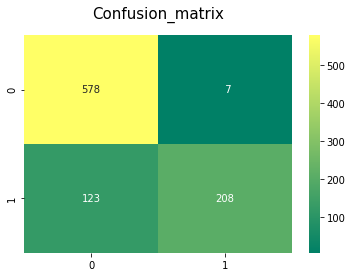

In [43]:
##knn
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train,y_train)
pred_knn=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(pred_knn,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=10) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(model,train_features,Target,cv=10,scoring='accuracy')
print('The cross validated score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,train_features,Target,cv=10)
sns.heatmap(confusion_matrix(Target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)


## Gaussian Naive Bayes


--------------The Accuracy of the model----------------------------
The accuracy of the Gaussian Naive Bayes Classifier is 96.73
The cross validated score for Gaussian Naive Bayes classifier is: 96.39


Text(0.5,1.05,'Confusion_matrix')

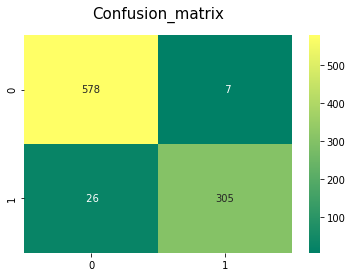

In [45]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
gnb_pred=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gaussian Naive Bayes Classifier is',round(accuracy_score(gnb_pred,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=10) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(model,train_features,Target,cv=10,scoring='accuracy')
print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,train_features,Target,cv=10)
sns.heatmap(confusion_matrix(Target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the DecisionTree Classifier is 96.73
The cross validated score for Decision Tree classifier is: 94.34


Text(0.5,1.05,'Confusion_matrix')

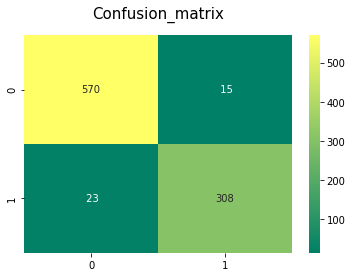

In [46]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
model.fit(X_train,y_train)
dtree_pred=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(dtree_pred,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=10) # k=10, split the data into 10 equal parts
result_tree=cross_val_score(model,train_features,Target,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree classifier is:',round(result_tree.mean()*100,2))
y_pred = cross_val_predict(model,train_features,Target,cv=10)
sns.heatmap(confusion_matrix(Target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)


## Ada Boost

--------------The Accuracy of the model----------------------------
The accuracy of the AdaBoostClassifier is 97.09
The cross validated score for AdaBoostClassifier is: 97.05


Text(0.5,1.05,'Confusion_matrix')

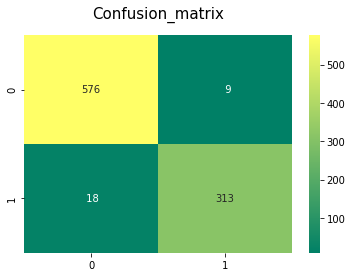

In [47]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(X_train,y_train)
adb_pred=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the AdaBoostClassifier is',round(accuracy_score(adb_pred,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=10) # k=10, split the data into 10 equal parts
result_adb=cross_val_score(model,train_features,Target,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_adb.mean()*100,2))
y_pred = cross_val_predict(model,train_features,Target,cv=10)
sns.heatmap(confusion_matrix(Target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)


## Linear Discriminant Analysis

--------------The Accuracy of the model----------------------------
The accuracy of the LinearDiscriminantAnalysis is 97.82
The cross validated score for AdaBoostClassifier is: 97.81


Text(0.5,1.05,'Confusion_matrix')

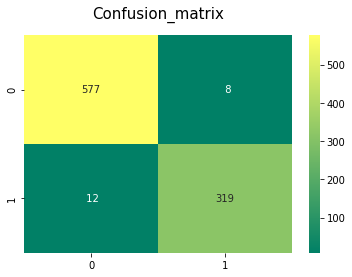

In [48]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction_lda=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the LinearDiscriminantAnalysis is',round(accuracy_score(prediction_lda,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=10) # k=10, split the data into 10 equal parts
result_lda=cross_val_score(model,train_features,Target,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_lda.mean()*100,2))
y_pred = cross_val_predict(model,train_features,Target,cv=10)
sns.heatmap(confusion_matrix(Target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)


--------------The Accuracy of the model----------------------------
The accuracy of the GBC is 97.45
The cross validated score for AdaBoostClassifier is: 97.38


Text(0.5,1.05,'Confusion_matrix')

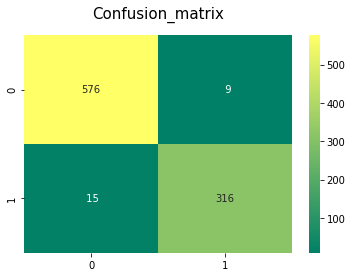

In [49]:
#GBC
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
gbc_pred=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the GBC is',round(accuracy_score(gbc_pred,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=10) # k=10, split the data into 10 equal parts
result_gbc=cross_val_score(model,train_features,Target,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model,train_features,Target,cv=10)
sns.heatmap(confusion_matrix(Target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)


## Model evaluation and comparison
We can now rank our evaluation of all the models to choose the best one.

In [50]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'AdaBoostClassifier', 
              'Gradient Decent', 'Linear Discriminant Analysis', 
              'Decision Tree'],
    'Score': [result_svm.mean(), result_knn.mean(), result_lr.mean(), 
              result_rm.mean(), result_gnb.mean(), result_adb.mean(), 
              result_gbc.mean(), result_lda.mean(), result_tree.mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
0,Support Vector Machines,0.978141
2,Logistic Regression,0.978141
3,Random Forest,0.978141
7,Linear Discriminant Analysis,0.978141
6,Gradient Decent,0.973793
5,AdaBoostClassifier,0.970520
4,Naive Bayes,0.963939
8,Decision Tree,0.943439
1,KNN,0.857964


### By looking at all the Confusion Matrices, we can say that Logistic Regression, Linear Discriminant Analysis, Random Forest & SVM classifier has a higher chance in correctly predicting dead passengers.

### Now we shall try to improve the model's performance with some parameter tuning.

I copied the train and test dataset for reference earlier during feature engineering

In [46]:
train_X = traindf.drop("Survived", axis=1)
train_Y=traindf["Survived"]
test_X  = testdf.copy()
train_X.shape, train_Y.shape, test_X.shape

((916, 54), (916,), (393, 54))

## Gradient boosting tunning

In [47]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 3, verbose = 1)

modelf.fit(train_X,train_Y)

# Best score
modelf.best_score_

# Best Estimator
modelf.best_estimator_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    7.7s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   20.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:   39.8s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed:  2.4min
[Parallel(n_jobs=3)]: Done 1920 out of 1920 | elapsed:  2.6min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [48]:
modelf.best_score_

0.9781659388646288

## Random Forest Classifier Parameters tunning

In [50]:
 
model = RandomForestClassifier()
n_estim=range(100,1000,100)

## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model,param_grid = param_grid, cv=10, scoring="accuracy", n_jobs= 5, verbose = 1)

model_rf.fit(train_X,train_Y)



# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   17.2s
[Parallel(n_jobs=5)]: Done  90 out of  90 | elapsed:   56.0s finished


0.9770742358078602


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## LDA Parameter tunning

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model =LinearDiscriminantAnalysis()
param_grid = {'tol':[0.001,0.01,.1,.2]}

modell = GridSearchCV(model,param_grid = param_grid, cv=10, scoring="accuracy", n_jobs= 4, verbose = 1)

modell.fit(train_X,train_Y)

# Best score
print(modell.best_score_)

# Best Estimator
modell.best_estimator_


Fitting 10 folds for each of 4 candidates, totalling 40 fits
0.9781659388646288


[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    4.7s finished


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.001)

## SVC

In [53]:
model= SVC()
param_grid = {'kernel': ['rbf','linear'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

modelsvm = GridSearchCV(model,param_grid = param_grid, cv=10, scoring="accuracy", n_jobs= 4, verbose = 1)

modelsvm.fit(train_X,train_Y)

print(modelsvm.best_estimator_)

# Best score
print(modelsvm.best_score_)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=4)]: Done  49 tasks      | elapsed:    5.1s


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.9781659388646288


[Parallel(n_jobs=4)]: Done 560 out of 560 | elapsed:   17.8s finished


## Apply the Estimator which we got from parameter tuning of Random Forest


In [54]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)

#print("Important features")
#pd.Series(random_forest.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
#print('__'*30)
print(acc_random_forest)

99.34


### As we can see, the Random forest Parameter tuning worked better.

#### Now we can submit our prediction

In [55]:
pd.DataFrame({
        "traveller_ID":ID,
        "Survived": Y_pred_rf}).set_index('traveller_ID').to_csv('Lagos_Celestine.csv')

In [56]:
pd.read_csv("Lagos_Celestine.csv")

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,0
4,1195,0
...,...,...
388,325,0
389,919,0
390,532,0
391,1159,1
